In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # How we wish to appear to CL
url = 'https://charlottesville.craigslist.org/search/moa?bundleDuplicates=1&postal=22904&search_distance=100#search=1~gallery~0~0' # The page we want to scrape
raw = requests.get(url,headers=header) # Get page

In [116]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings of the kind we want

In [118]:
import re # Regular expressions

brands = [
    'iphone', 'iPhone', 'samsung', 'Samsung', 'nokia', 'Nokia', 'sony', 'Sony', 'huawei', 'Huawei', 
    'xiaomi', 'Xiaomi', 'oppo', 'Oppo', 'vivo', 'Vivo', 'lg', 'LG', 'motorola', 'Motorola', 
    'google', 'Google', 'oneplus', 'OnePlus', 'realme', 'Realme', 'asus', 'Asus', 'lenovo', 'Lenovo', 
    'meizu', 'Meizu', 'htc', 'HTC', 'alcatel', 'Alcatel', 'blackberry', 'BlackBerry', 'panasonic', 'Panasonic', 
    'sharp', 'Sharp', 'zte', 'ZTE', 'honor', 'Honor', 'lava', 'Lava', 'micromax', 'Micromax', 
    'coolpad', 'Coolpad', 'infinix', 'Infinix', 'tecno', 'Tecno', 'bluboo', 'Bluboo', 'leeco', 'LeEco', 
    'doogee', 'Doogee', 'gionee', 'Gionee', 'i-mobile', 'I-Mobile', 'fly', 'Fly', 'tcl', 'TCL', 
    'vernee', 'Vernee', 'homtom', 'HomTom', 'elephone', 'Elephone', 'umidigi', 'Umidigi', 'cubot', 'Cubot', 
    'oukitel', 'Oukitel', 'smartisan', 'Smartisan', 'nubia', 'Nubia', 'meizu', 'Meizu', 'xaomi', 'Xaomi', 
    'posh', 'Posh', 'essential', 'Essential', 'bluboo', 'Bluboo', 'itel', 'Itel', 'alcatel', 'Alcatel', 
    'wingtech', 'Wingtech', 'maxwest', 'Maxwest', 'hmd', 'HMD', 'vkworld', 'Vkworld', 'sinno', 'Sinno', 
    'jeep', 'Jeep', 'doogee', 'Doogee', 'innos', 'Innos', 'k-touch', 'K-touch'
]


data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]
    # Get years from title string:
    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title ) # Find year references
    if regex_search is None: # If no hits, record year as missing value
        year = np.nan
    else: # If hits, record year as first match
        year = regex_search.group(0)
    #
    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand})

In [120]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df.drop(columns=['year'], inplace=True)
print(df.shape)
df.to_csv('.craigslist_cville_phones.csv') # Save data in case of a disaster
df.head(20)

(346, 4)


,title,price,link,brand
0,samsung 15w qi fast charger,30,https://washingtondc.craigslist.org/nva/mob/d/...,samsung
1,samsung star wars edition note 10 plus cellphone,1300,https://richmond.craigslist.org/mob/d/ashland-...,samsung
2,"dual sim unlocked samsung galaxy a02s 6.5"" 32g...",90,https://washingtondc.craigslist.org/nva/mob/d/...,samsung
3,unlocked new apple iphone 13 128gb midnight black,500,https://washingtondc.craigslist.org/nva/mob/d/...,iphone
4,"new google pixel 9 pro xl unlocked 6.8"" inch s...",900,https://washingtondc.craigslist.org/nva/mob/d/...,google
5,unlocked oneplus 9 5g 128gb / 8gb like new 6.5...,300,https://washingtondc.craigslist.org/nva/mob/d/...,oneplus
6,like new apple iphone 13 pro 256gb unlocked w/...,700,https://washingtondc.craigslist.org/nva/mob/d/...,iphone
7,"new google pixel 9 pro unlocked 6.3"" sealed 128gb",850,https://washingtondc.craigslist.org/nva/mob/d/...,google
8,new apple iphone 13 pro max 128gb unlocked w/ ...,750,https://washingtondc.craigslist.org/nva/mob/d/...,iphone
9,"new google pixel 9 pro xl unlocked 6.8"" inch s...",900,https://washingtondc.craigslist.org/nva/mob/d/...,google


Text(0.5, 1.0, 'Craigslist Phones by Price')

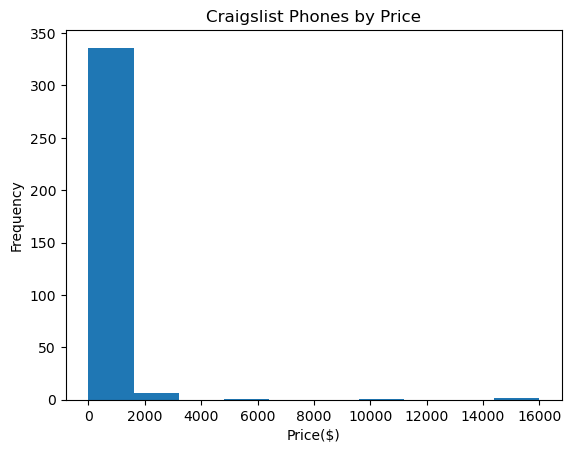

In [122]:
df['price'].hist(grid=False)
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.title('Craigslist Phones by Price')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'samsung'),
  Text(1, 0, 'iphone'),
  Text(2, 0, 'google'),
  Text(3, 0, 'oneplus'),
  Text(4, 0, 'missing'),
  Text(5, 0, 'motorola'),
  Text(6, 0, 'lg'),
  Text(7, 0, 'tcl'),
  Text(8, 0, 'nokia'),
  Text(9, 0, 'oukitel'),
  Text(10, 0, 'essential'),
  Text(11, 0, 'blackberry'),
  Text(12, 0, 'asus'),
  Text(13, 0, 'huawei')])

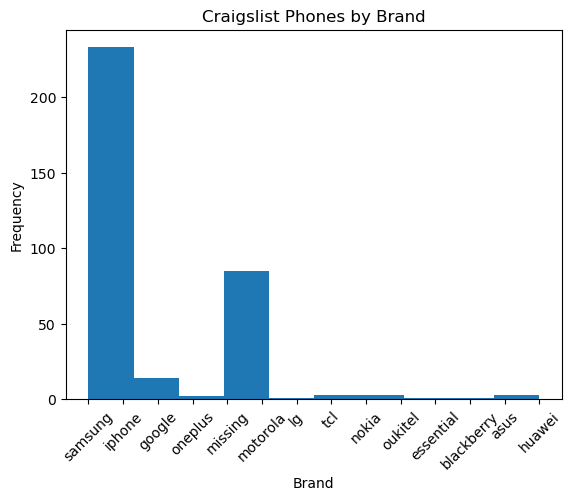

In [124]:
df['brand'].hist(grid=False)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Craigslist Phones by Brand')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Brand/Price Scatterplot')

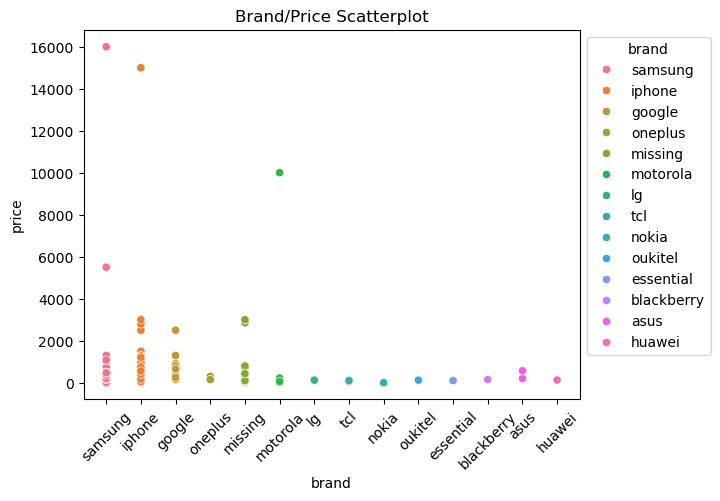

In [128]:
ax = sns.scatterplot(data=df, x='brand', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.title('Brand/Price Scatterplot')
